# Étape 1 : Chargement et nettoyage des données
### Nous commencerons par charger le dataset, examiner sa structure, identifier et traiter les valeurs manquantes, et enlever les colonnes inutiles.

In [1]:
import pandas as pd
import numpy as np

# Chargement des données
df = pd.read_csv('./MP-4MLSP.csv')

# Aperçu des premières lignes et des informations du dataframe
print(df.head())
print(df.info())

# Identifier et traiter les valeurs manquantes
print(df.isnull().sum())

# Suppression des colonnes inutiles
df.drop(['Unnamed: 0', 'id'], axis=1, inplace=True)

# Imputation des valeurs manquantes
# Exemple: Imputation par la médiane pour les variables numériques
for col in ['Age', 'Ease of Online booking', 'Gate location', 'Leg room service', 'Arrival Delay in Minutes']:
    if df[col].dtype in ['int64', 'float64']:
        df[col].fillna(df[col].median(), inplace=True)

# Vérifier encore les informations pour s'assurer que les valeurs manquantes sont traitées
print(df.isnull().sum())


   Unnamed: 0      id  Gender      Customer Type   Age   Type of Travel  \
0           0   19149  Female  disloyal Customer  19.0  Business travel   
1           1   69112    Male     Loyal Customer  54.0  Business travel   
2           2    4725  Female  disloyal Customer  23.0  Business travel   
3           3  115546    Male     Loyal Customer  58.0  Business travel   
4           4   59440    Male     Loyal Customer  45.0  Business travel   

      Class  Flight Distance  Inflight wifi service  \
0       Eco            353.0                      3   
1  Eco Plus           1088.0                      5   
2  Business            977.0                      2   
3  Business           2932.0                      2   
4       Eco            667.0                      1   

   Departure/Arrival time convenient  ...  On-board service  Leg room service  \
0                                  4  ...                 5               5.0   
1                                  2  ...               

C:\Users\anasa\AppData\Local\Temp\ipykernel_11616\1415131434.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
C:\Users\anasa\AppData\Local\Temp\ipykernel_11616\1415131434.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

# Étape 2 : Analyse exploratoire des données
### Après le nettoyage, nous allons visualiser les distributions des variables, les relations entre les variables explicatives et les variables cibles.

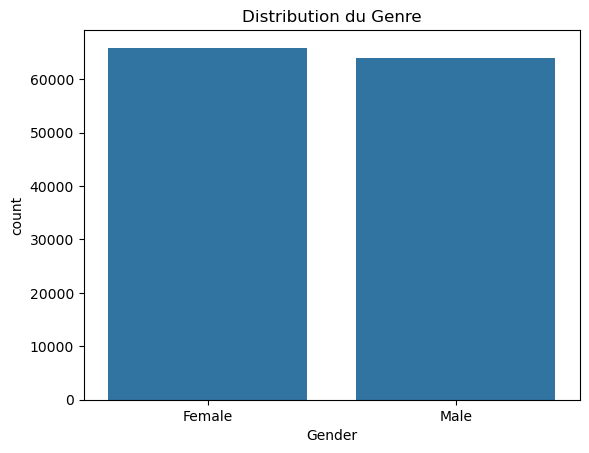

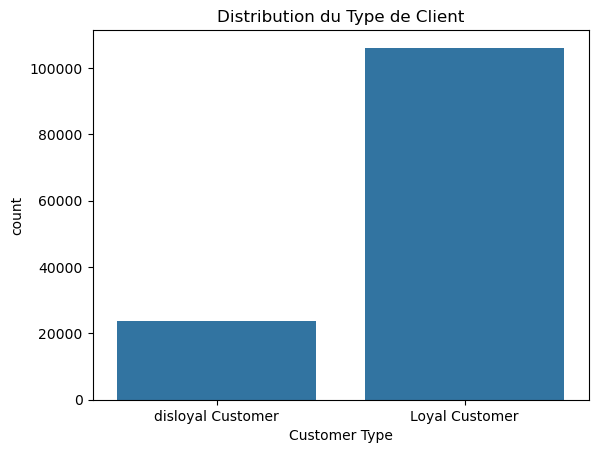

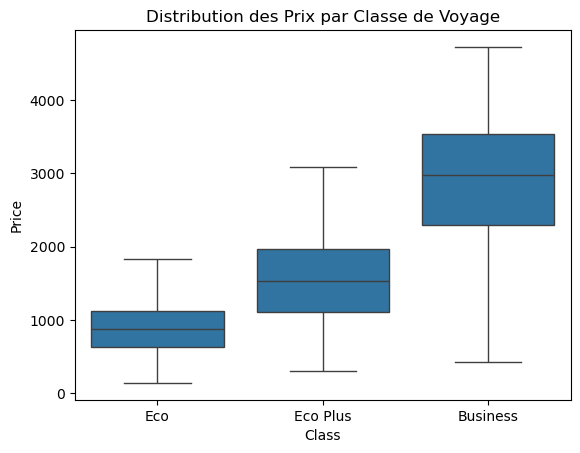

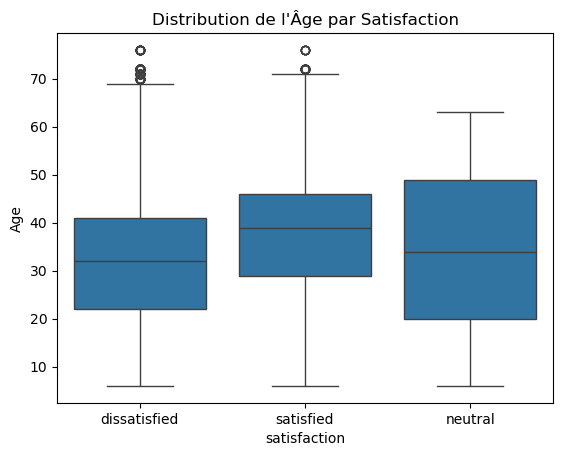

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution des variables catégorielles
sns.countplot(x='Gender', data=df)
plt.title('Distribution du Genre')
plt.show()

sns.countplot(x='Customer Type', data=df)
plt.title('Distribution du Type de Client')
plt.show()

# Boxplots pour visualiser la distribution des prix en fonction des classes
sns.boxplot(x='Class', y='Price', data=df)
plt.title('Distribution des Prix par Classe de Voyage')
plt.show()

# Relation entre la satisfaction et les autres variables
sns.boxplot(x='satisfaction', y='Age', data=df)
plt.title('Distribution de l\'Âge par Satisfaction')
plt.show()

### Visualisation des Données

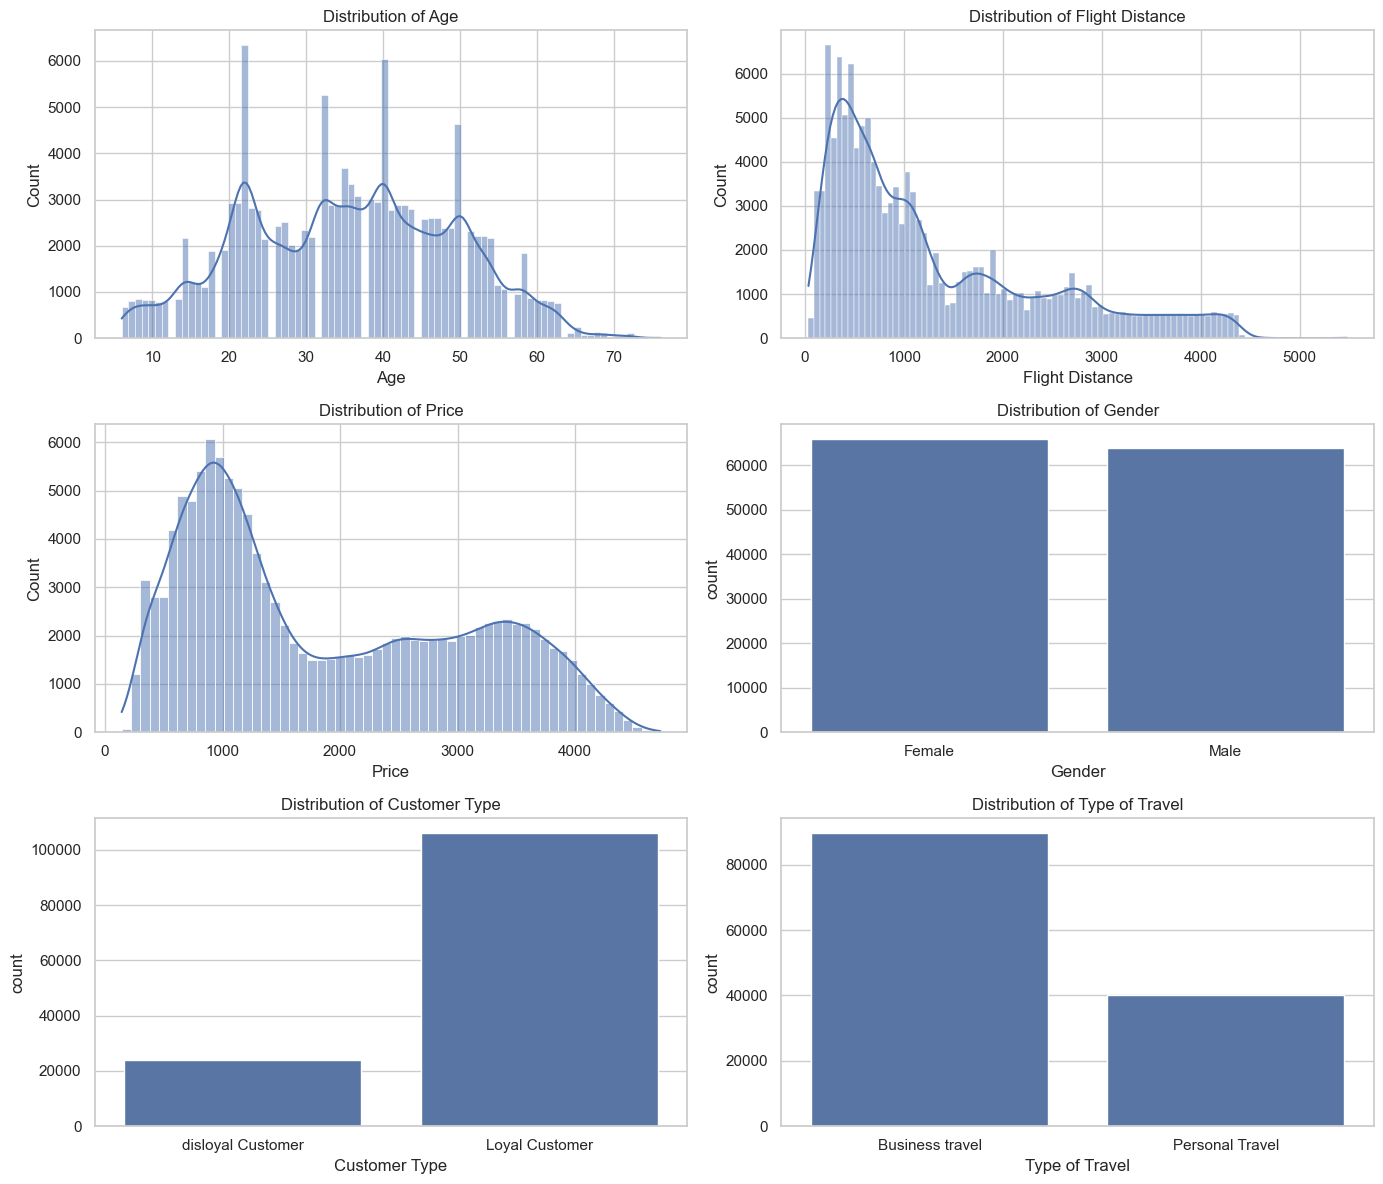

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create a figure to hold the plots
fig, ax = plt.subplots(3, 2, figsize=(14, 12))

# Histograms for continuous variables
sns.histplot(df['Age'], kde=True, ax=ax[0, 0])
ax[0, 0].set_title('Distribution of Age')

sns.histplot(df['Flight Distance'], kde=True, ax=ax[0, 1])
ax[0, 1].set_title('Distribution of Flight Distance')

sns.histplot(df['Price'], kde=True, ax=ax[1, 0])
ax[1, 0].set_title('Distribution of Price')

# Bar plots for categorical variables
sns.countplot(x='Gender', data=df, ax=ax[1, 1])
ax[1, 1].set_title('Distribution of Gender')

sns.countplot(x='Customer Type', data=df, ax=ax[2, 0])
ax[2, 0].set_title('Distribution of Customer Type')

sns.countplot(x='Type of Travel', data=df, ax=ax[2, 1])
ax[2, 1].set_title('Distribution of Type of Travel')

# Adjust layout
plt.tight_layout()
plt.show()

# Étape 2 (suite) : Analyse Exploratoire des Données (AED)
### Visualisation des relations et des corrélations
### Pour comprendre mieux les relations entre les variables et notamment leur impact sur les variables cibles 'Satisfaction' et 'Price', nous allons créer des visualisations plus spécifiques.

# Étape 1: Convertir les variables catégorielles en numériques
### Avant de calculer la matrice de corrélation, vous devez transformer toutes les variables catégorielles en variables numériques en utilisant un encodage approprié. L'encodage One-Hot est une méthode commune pour ce faire, mais pour les besoins de la matrice de corrélation, un encodage de label simple pourrait être plus approprié pour conserver la structure de DataFrame.

In [4]:
from sklearn.preprocessing import LabelEncoder

# Créer une copie du DataFrame pour éviter de modifier les données originales
df_numeric = df.copy()

# Liste des colonnes catégorielles
categorical_cols = df_numeric.select_dtypes(include=['object']).columns

# Appliquer LabelEncoder à chaque colonne catégorielle
label_encoder = LabelEncoder()
for col in categorical_cols:
    df_numeric[col] = label_encoder.fit_transform(df_numeric[col])

# Vérifier le nouveau DataFrame
print(df_numeric.head())

   Gender  Customer Type   Age  Type of Travel  Class  Flight Distance  \
0       0              1  19.0               0      1            353.0   
1       1              0  54.0               0      2           1088.0   
2       0              1  23.0               0      0            977.0   
3       1              0  58.0               0      0           2932.0   
4       1              0  45.0               0      1            667.0   

   Inflight wifi service  Departure/Arrival time convenient  \
0                      3                                  4   
1                      5                                  2   
2                      2                                  0   
3                      2                                  3   
4                      1                                  0   

   Ease of Online booking  Gate location  ...  On-board service  \
0                     3.0            4.0  ...                 5   
1                     2.0            2.0  

# Étape 2: Recalculer la matrice de corrélation
### Maintenant que toutes vos données sont numériques, vous pouvez recalculer la matrice de corrélation sans rencontrer l'erreur précédente.

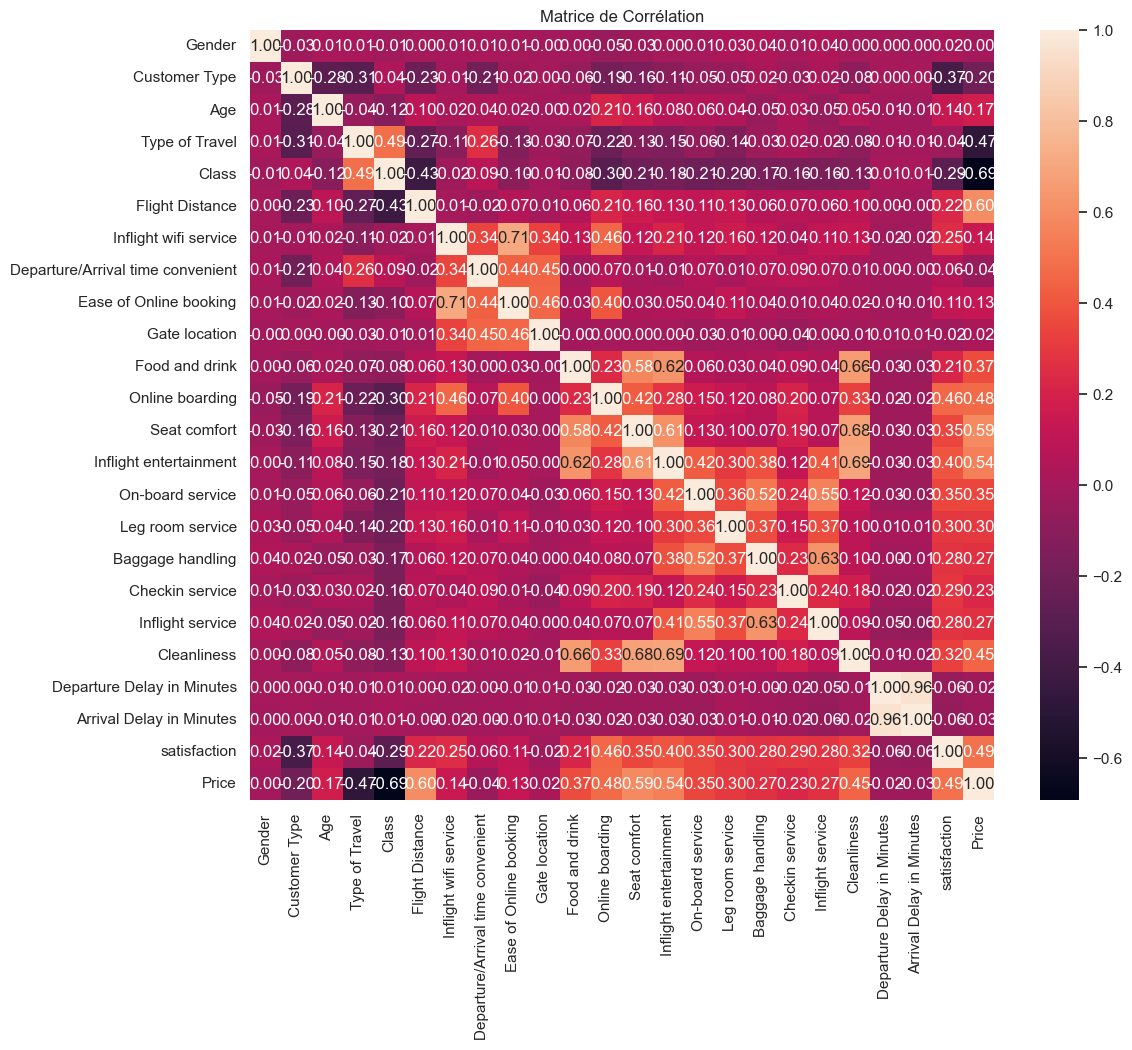

In [5]:
# Corrélation entre les variables numériques et 'Price'
correlation_matrix = df_numeric.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.title('Matrice de Corrélation')
plt.show()

# Étape 3: Visualisation des relations spécifiques
### Ensuite, vérifiez les relations spécifiques entre les variables, comme l'âge et le prix, tout en colorant par satisfaction. Assurez-vous que 'satisfaction' est encodée en numérique si vous voulez l'utiliser comme couleur dans un scatter plot.

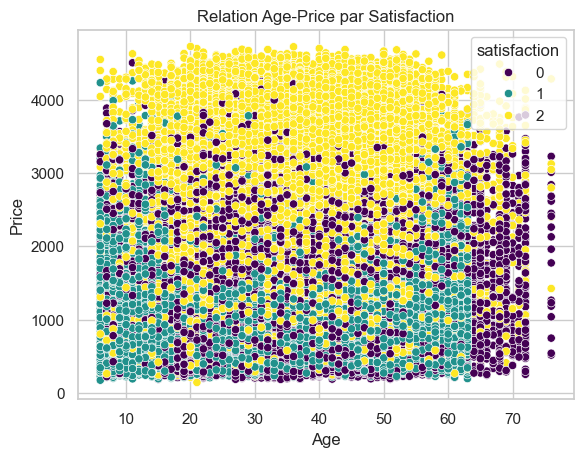

In [6]:
# Assurer que 'Satisfaction' est numérique si nécessaire
df_numeric['Satisfaction'] = label_encoder.fit_transform(df['satisfaction'])

# Visualisation de la relation spécifique
sns.scatterplot(x='Age', y='Price', hue='satisfaction', data=df_numeric, palette='viridis')
plt.title('Relation Age-Price par Satisfaction')
plt.show()

# Étape 3 : Classification sur la Variable "Satisfaction"
### 1. Prétraitement des données pour la classification
### Nous avons déjà traité les valeurs manquantes. Maintenant, nous allons sélectionner les variables, normaliser les variables numériques, et encoder les variables catégorielles.

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Sélection des variables explicatives et de la variable cible
X = df.drop(['satisfaction', 'Price'], axis=1)
y = df['satisfaction']

# Encodage des variables catégorielles et normalisation des variables numériques
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

# Préparation des jeux de données d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Application du prétraitement
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

### 2. Modélisation et optimisation des hyperparamètres

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Configuration du modèle de classification
model = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20]
}

# Recherche des meilleurs hyperparamètres
clf = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
clf.fit(X_train, y_train)

# Affichage des meilleurs paramètres et score
print("Meilleurs paramètres:", clf.best_params_)
print("Meilleur score:", clf.best_score_)

# Évaluation du modèle
from sklearn.metrics import classification_report
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

Meilleurs paramètres: {'max_depth': 20, 'n_estimators': 100}
Meilleur score: 0.9628695754186877
              precision    recall  f1-score   support

dissatisfied       0.96      0.96      0.96      7470
     neutral       0.96      1.00      0.98      7221
   satisfied       0.97      0.94      0.96     11285

    accuracy                           0.96     25976
   macro avg       0.96      0.97      0.96     25976
weighted avg       0.96      0.96      0.96     25976



# Étape 4 : Régression sur la Variable "Price"
### Pour la régression sur 'Price', nous répéterons des étapes similaires à celles de la classification, mais en utilisant des modèles de régression.

In [9]:
from sklearn.linear_model import Ridge

# Préparation des données
y_price = df['Price']
X_train, X_test, y_train_price, y_test_price = train_test_split(X, y_price, test_size=0.2, random_state=42, stratify=y)

# Application du prétraitement
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# Configuration du modèle de régression
model_ridge = Ridge()
param_grid_ridge = {
    'alpha': [0.1, 1.0, 10.0]
}

# Optimisation des hyperparamètres
ridge_clf = GridSearchCV(model_ridge, param_grid_ridge, cv=5, scoring='neg_mean_squared_error')
ridge_clf.fit(X_train, y_train_price)

# Évaluation du modèle
from sklearn.metrics import mean_squared_error
y_pred_price = ridge_clf.predict(X_test)
mse = mean_squared_error(y_test_price, y_pred_price)
print("MSE:", mse)

MSE: 69527.2727029398


In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.metrics import classification_report, mean_squared_error

y_class = df['satisfaction']  # pour la classification
y_reg = df['Price']  # pour la regression

# Séparation des ensembles de données
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X, y_class, test_size=0.2, random_state=42)
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y_reg, test_size=0.2, random_state=42)

# Normalisation des données
scaler = StandardScaler()
X_train_class = scaler.fit_transform(X_train_class)
X_test_class = scaler.transform(X_test_class)
X_train_reg = scaler.fit_transform(X_train_reg)
X_test_reg = scaler.transform(X_test_reg)

# Classification
# k-NN
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_class, y_train_class)
print("k-NN classification report:\n", classification_report(y_test_class, knn.predict(X_test_class)))

# SVM
svm = SVC(kernel='linear')
svm.fit(X_train_class, y_train_class)
print("SVM classification report:\n", classification_report(y_test_class, svm.predict(X_test_class)))

# LDA
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_class, y_train_class)
print("LDA classification report:\n", classification_report(y_test_class, lda.predict(X_test_class)))

# Decision Tree Classifier
dtc = DecisionTreeClassifier(max_depth=5)
dtc.fit(X_train_class, y_train_class)
print("Decision Tree classification report:\n", classification_report(y_test_class, dtc.predict(X_test_class)))

# Voting Classifier
voting_clf = VotingClassifier(estimators=[('knn', knn), ('svm', svm), ('lda', lda)], voting='hard')
voting_clf.fit(X_train_class, y_train_class)
print("Voting Classifier report:\n", classification_report(y_test_class, voting_clf.predict(X_test_class)))

# Régression
# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train_class, y_train_class)
print("Logistic Regression classification report:\n", classification_report(y_test_class, log_reg.predict(X_test_class)))

# Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train_reg, y_train_reg)
y_pred_reg = lin_reg.predict(X_test_reg)
print("Linear Regression MSE:", mean_squared_error(y_test_reg, y_pred_reg))

# Decision Tree Regression
dtr = DecisionTreeRegressor(max_depth=5)
dtr.fit(X_train_reg, y_train_reg)
y_pred_dtr = dtr.predict(X_test_reg)
print("Decision Tree Regression MSE:", mean_squared_error(y_test_reg, y_pred_dtr))

ValueError: could not convert string to float: 'Male'